# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq  # library to read parquet files

In [2]:
# train data base

train = pd.read_csv('../train.csv')
train.rename(columns = {'State.Name':'State_Name'}, inplace = True)
train.head()

,ID,State_Name,Year,Age,Incidence
0,f8312a4,Alabama,1990,65-69,4685.284313
1,3effa36,Alabama,1990,70-74,4827.052043
2,1e8044b,Alabama,1990,75-79,4377.956914
3,d875d65,Alabama,1990,80-84,3822.732993
4,46e6695,Alabama,1990,85-89,3470.199503


In [3]:
test = pd.read_csv('../test.csv')
test.rename(columns = {'State.Name':'State_Name'}, inplace = True)
test.head()

,ID,State_Name,Year,Age
0,6c06615,Delaware,1990,65-69
1,e0cf76e,Delaware,1990,70-74
2,e9f95f0,Delaware,1990,75-79
3,5dffe44,Delaware,1990,80-84
4,9f9ea9b,Delaware,1990,85-89


In [4]:
# read parquet file and make it pandas dataframe

haps = pq.read_table('../supplementary_HAPS.parquet').to_pandas()
haps.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
haps.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-04,Arsenic (TSP) STP,0.0,0.0
1,Alabama,1980-01-16,Arsenic (TSP) STP,0.0,0.0
2,Alabama,1980-01-28,Arsenic (TSP) STP,0.0,0.0


In [5]:
# Check if arithmetic mean and X1st have different values

bool_check = haps['Arithmetic_Mean'] == haps['X1st_Max_Value']
bool_check.value_counts()

True     9522688
False     311680
dtype: int64

In [6]:
# lead parquet file into pandas dataframe

lead = pq.read_table('../supplementary_LEAD.parquet').to_pandas()
lead.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
lead.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26
2,Alabama,1980-01-28,Lead (TSP) STP,0.13,0.13


In [7]:
bool_check = lead['Arithmetic_Mean'] == lead['X1st_Max_Value']
bool_check.value_counts()

True    866835
dtype: int64

In [8]:
# Drop column 'X1st_Max_Value' because it contains the same information as Arithmetic_Mean

lead.drop(columns='X1st_Max_Value', axis = 1, inplace = True)

In [9]:
# nono parquete file into pandas dataframe

nono = pq.read_table('../supplementary_NONOxNOy.parquet').to_pandas()
nono.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
nono.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-01,Nitric oxide (NO),54.458333,275.0
1,Alabama,1980-01-02,Nitric oxide (NO),130.545455,279.0
2,Alabama,1980-01-03,Nitric oxide (NO),122.333333,421.0


In [10]:
bool_check = nono['Arithmetic_Mean'] == nono['X1st_Max_Value']
bool_check.value_counts()

False    7680903
True      306777
dtype: int64

In [11]:
#vocs parquet file into pandas dataframe

vocs = pq.read_table('../supplementary_VOCS.parquet').to_pandas()
vocs.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
vocs.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-01,Total NMOC (non-methane organic compound),627.083333,2020.0
1,Alabama,1980-01-02,Total NMOC (non-methane organic compound),1240.909091,3360.0
2,Alabama,1980-01-03,Total NMOC (non-methane organic compound),2079.166667,5670.0


In [12]:
# We don't drop the column in vocs
bool_check = vocs['Arithmetic_Mean'] == vocs['X1st_Max_Value']
bool_check.value_counts()

True     18332740
False     8268395
dtype: int64

# EDA

In [13]:
# we can see the parquet files have more than 7 million observations, vocs have 26 million observatios
print(train.shape, haps.shape, lead.shape, nono.shape, vocs.shape)

(4500, 5) (9834368, 5) (866835, 4) (7987680, 5) (26601135, 5)


#### First we explore train

In [14]:
# we can see there are no missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4500 non-null   object 
 1   State_Name  4500 non-null   object 
 2   Year        4500 non-null   int64  
 3   Age         4500 non-null   object 
 4   Incidence   4500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 175.9+ KB


In [15]:
train.Age.value_counts()

65-69    750
70-74    750
75-79    750
80-84    750
85-89    750
90-94    750
Name: Age, dtype: int64

In [16]:
train['State_Name'].value_counts(dropna = False).head()

Alabama      180
Iowa         180
Texas        180
Tennessee    180
Oregon       180
Name: State_Name, dtype: int64

In [17]:
test['State_Name'].value_counts(dropna = False).head()

Delaware         180
Illinois         180
Wisconsin        180
West Virginia    180
Virginia         180
Name: State_Name, dtype: int64

In [18]:
# We can eliminate years from lead, haps, nono, vocs data bases.
# because we will not use

#train.Year.value_counts(dropna = False).sort_values()
#train.Year.min() #1990
#train.Year.max() #2019
#test.Year.min() #1990
test.Year.max() #2019

2019

In [19]:
train.Incidence.describe()

count    4500.000000
mean     4704.663094
std      1525.974789
min      2725.462720
25%      3448.309431
50%      3999.505948
75%      5862.682928
max      9200.199095
Name: Incidence, dtype: float64

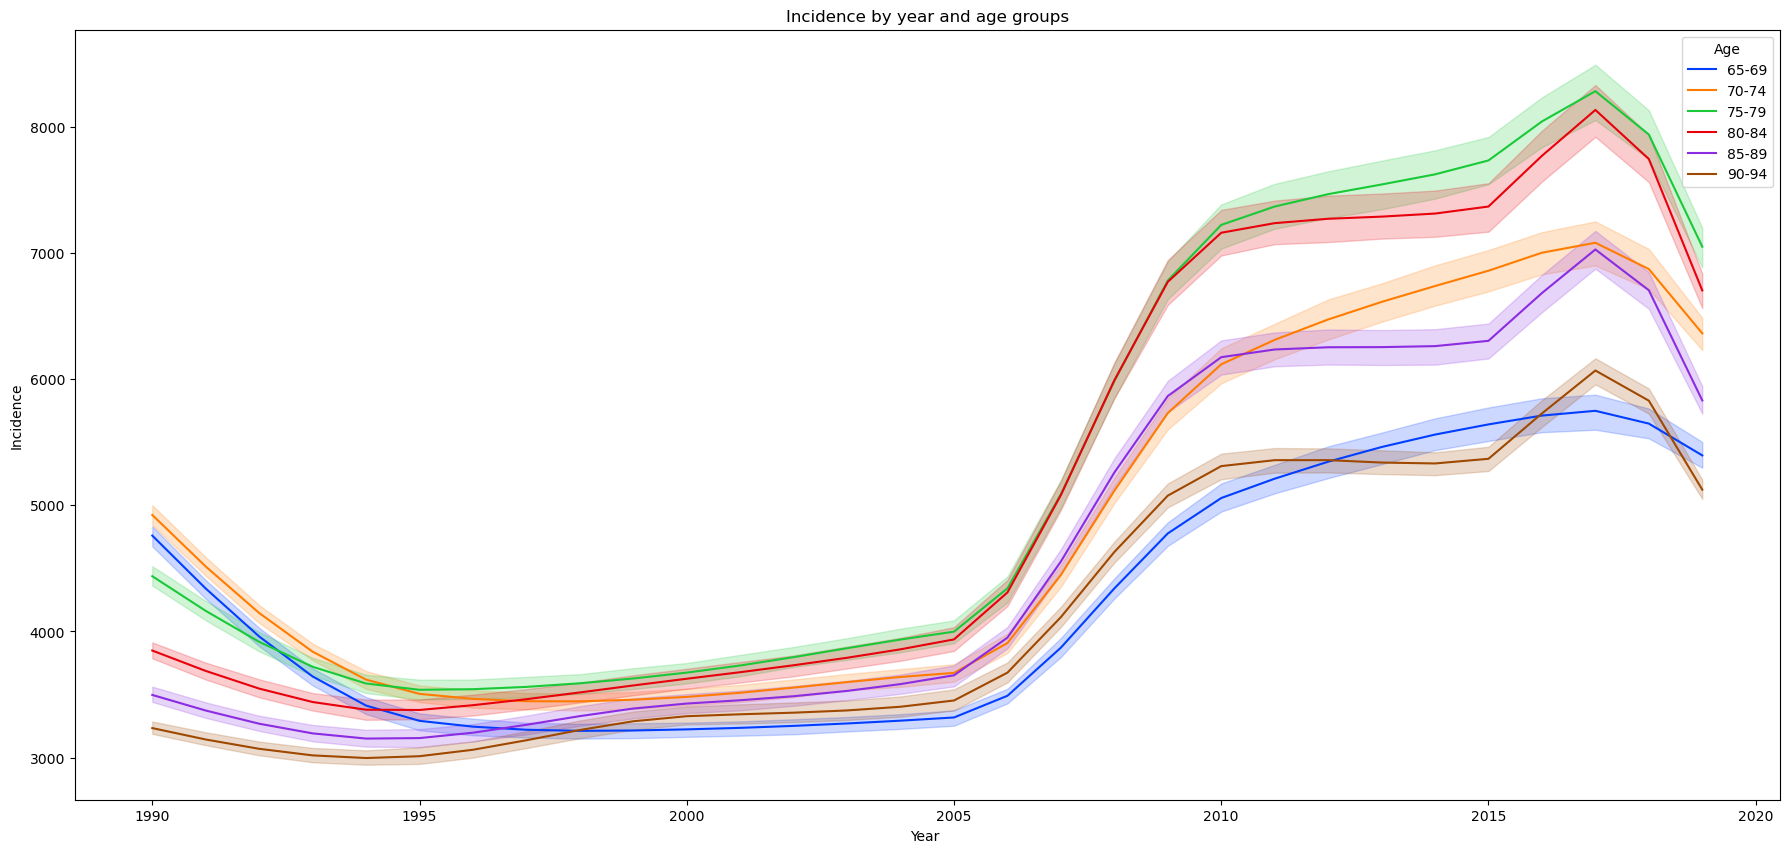

In [20]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='Age', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Incidence by year and age groups');

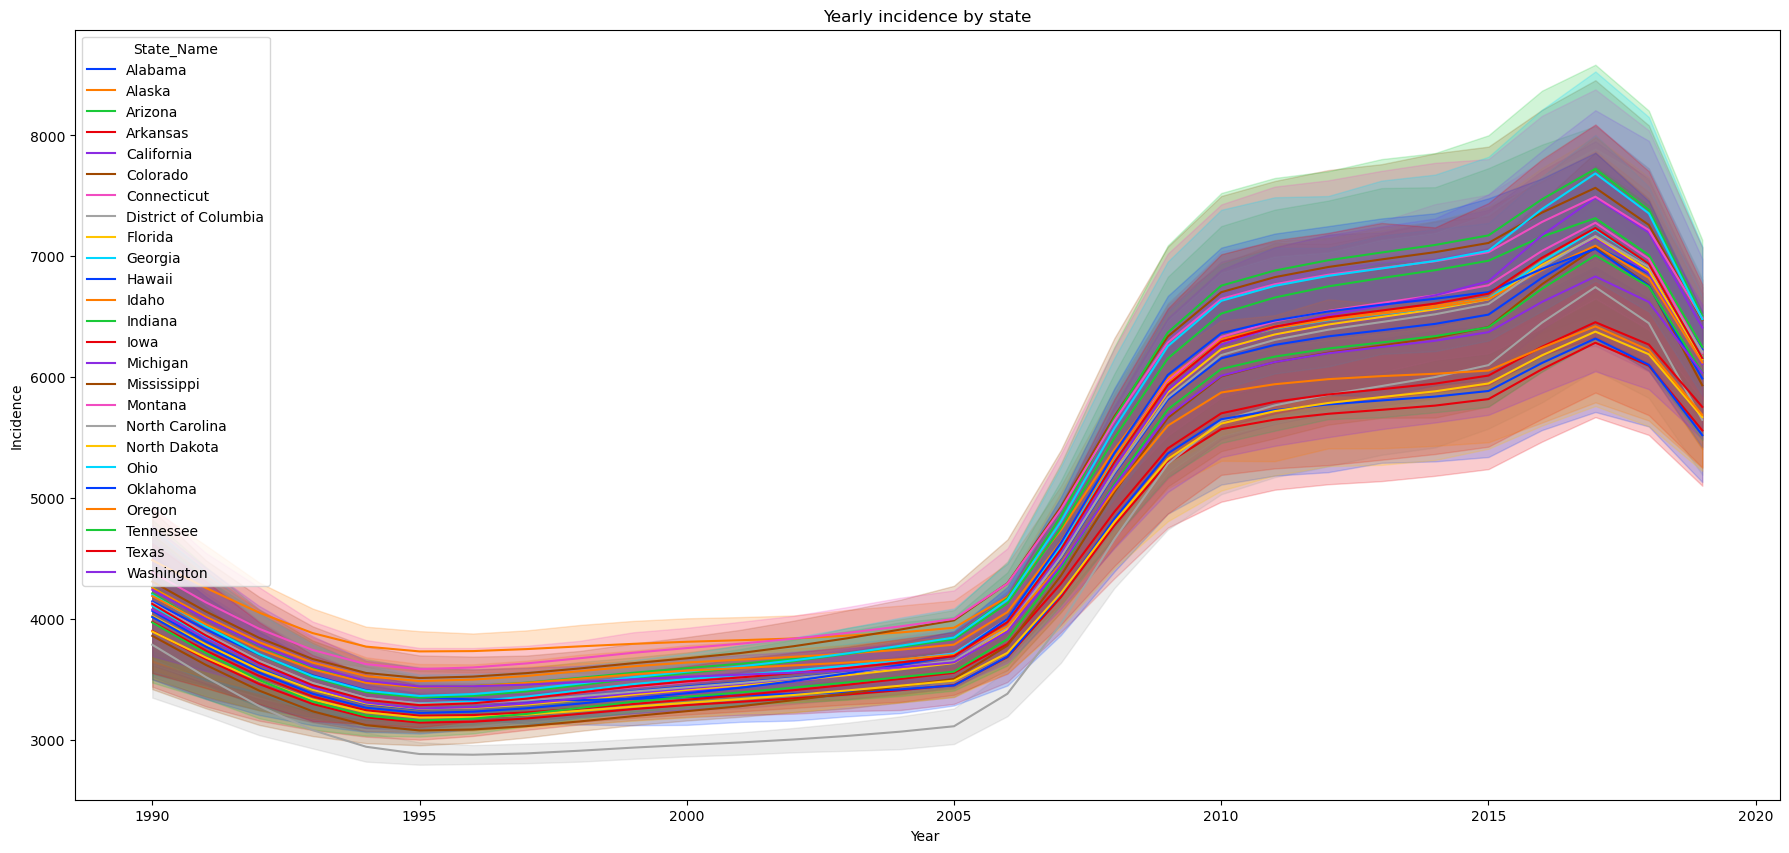

In [21]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='State_Name', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Yearly incidence by state');

## Understand  dates:
- train: yearly info

In [22]:
# more than one observation per month, 12 months per year
lead['Date_Local'].head(8)

0    1980-01-04
1    1980-01-16
2    1980-01-28
3    1980-02-09
4    1980-02-21
5    1980-03-04
6    1980-03-16
7    1980-03-28
Name: Date_Local, dtype: object

In [23]:
lead['State_Name'].value_counts(dropna = False).head()

California        96327
Pennsylvania      86556
Missouri          83480
Texas             77701
South Carolina    48005
Name: State_Name, dtype: int64

In [24]:
lead.isnull().sum()

State_Name         0
Date_Local         0
Parameter_Name     0
Arithmetic_Mean    0
dtype: int64

In [25]:
# I am interested in agregating data BY STATE and keeping 
# - Global max value per year
# - Global max mean value per year
# - Global mean of value per year
# - Global mean of means per year
# Average of monthly averages by state and year

# I need to add month-year column
# I need to add year column

In [26]:
# WE have more than one parameter in each data base

lead['Parameter_Name'].value_counts(dropna = False)

Lead (TSP) STP          706949
Lead (TSP) LC           148507
Lead PM10 LC FRM/FEM     11379
Name: Parameter_Name, dtype: int64

In [27]:
haps['Parameter_Name'].value_counts(dropna = False).head(5)

Lead PM2.5 LC         712435
Nickel PM2.5 LC       712432
Manganese PM2.5 LC    712121
Chromium PM2.5 LC     710638
Arsenic PM2.5 LC      710485
Name: Parameter_Name, dtype: int64

In [28]:
# WE have different number of observations per day
lead['Date_Local'].value_counts(dropna = False)

1986-02-01    779
1985-05-01    777
1986-06-01    744
1983-03-01    688
1985-01-01    670
             ... 
2000-11-19      1
2000-11-13      1
2000-11-07      1
2000-11-03      1
1981-12-13      1
Name: Date_Local, Length: 14571, dtype: int64

In [29]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866835 entries, 0 to 866834
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State_Name       866835 non-null  object 
 1   Date_Local       866835 non-null  object 
 2   Parameter_Name   866835 non-null  object 
 3   Arithmetic_Mean  866835 non-null  float64
dtypes: float64(1), object(3)
memory usage: 26.5+ MB


## LEAD
#### Aggregate by month-year (later by year)

In [30]:
lead['Date_Local'] = pd.to_datetime(lead['Date_Local'])

In [31]:
lead['year_month'] = lead['Date_Local'].dt.strftime('%Y-%m')
lead['year'] = lead['Date_Local'].dt.strftime('%Y')

In [32]:
# changing year to integer to aggregate properly
lead['year'] = lead['year'].astype('int')

In [33]:
lead.shape

(866835, 6)

In [34]:
lead.head(2)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,year_month,year
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,1980-01,1980
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,1980-01,1980


In [35]:
# aggregate by month-year
lead_year_month = lead.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max']})
lead_year_month.reset_index(inplace = True)
lead_year_month.head(2)

State_Name Parameter_Name year_month    year Arithmetic_Mean              
                                          mean            mean    min    max
0    Alabama  Lead (TSP) LC    2009-01  2009.0        0.271900  0.056  0.686
1    Alabama  Lead (TSP) LC    2009-02  2009.0        0.619571  0.222  0.914

In [36]:
# Changing the names of lead_year_month

# We use the header and subheader and join them with '_'

agg_col_names = lead_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

lead_year_month.columns = elements

lead_year_month.head(3)

,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max
0,Alabama,Lead (TSP) LC,2009-01,2009.0,0.271900,0.056,0.686
1,Alabama,Lead (TSP) LC,2009-02,2009.0,0.619571,0.222,0.914
2,Alabama,Lead (TSP) LC,2009-03,2009.0,0.985500,0.042,3.225


#### Lead aggregate by year

In [37]:
# aggregate by year
lead_year = lead_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max'})
lead_year.reset_index(inplace = True)

lead_year.head(3)

,State_Name_,Parameter_Name_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max
0,Alabama,Lead (TSP) LC,2009.0,0.438238,0.026,3.225
1,Alabama,Lead (TSP) LC,2010.0,0.628359,0.009,2.651
2,Alabama,Lead (TSP) LC,2011.0,0.619585,0.013,4.348


In [38]:
# No missing value
lead_year.isnull().sum()

State_Name_             0
Parameter_Name_         0
year_mean               0
Arithmetic_Mean_mean    0
Arithmetic_Mean_min     0
Arithmetic_Mean_max     0
dtype: int64

In [39]:
# Creating pivot table to have per state and year the different parameters as columns

lead_trans = lead_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
lead_trans.reset_index(inplace = True)
lead_trans.head(3)

State_Name_ year_mean Arithmetic_Mean_mean                 \
Parameter_Name_                              Lead (TSP) LC Lead (TSP) STP   
0                   Alabama    1980.0                  NaN       1.011834   
1                   Alabama    1981.0                  NaN       0.830934   
2                   Alabama    1982.0                  NaN       0.834853   

                                     Arithmetic_Mean_min                 \
Parameter_Name_ Lead PM10 LC FRM/FEM       Lead (TSP) LC Lead (TSP) STP   
0                                NaN                 NaN          0.020   
1                                NaN                 NaN          0.000   
2                                NaN                 NaN          0.016   

                                     Arithmetic_Mean_max                 \
Parameter_Name_ Lead PM10 LC FRM/FEM       Lead (TSP) LC Lead (TSP) STP   
0                                NaN                 NaN          11.08   
1                                NaN                 NaN          23.20   
2                                NaN                 NaN          18.58   

                                      
Parameter_Name_ Lead PM10 LC FRM/FEM  
0                                NaN  
1                                NaN  
2                                NaN

In [40]:
# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = lead_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

lead_trans.columns = elements

lead_trans.head(3)

,State_Name__,year_mean_,Arithmetic_Mean_mean_Lead_(TSP)_LC,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_min_Lead_(TSP)_LC,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_max_Lead_(TSP)_LC,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_PM10_LC_FRM/FEM
0,Alabama,1980.0,NaN,1.011834,NaN,NaN,0.020,NaN,NaN,11.08,NaN
1,Alabama,1981.0,NaN,0.830934,NaN,NaN,0.000,NaN,NaN,23.20,NaN
2,Alabama,1982.0,NaN,0.834853,NaN,NaN,0.016,NaN,NaN,18.58,NaN


--- 
Checking if missing values in columns are more than 20%
Creating lag variables

---

In [41]:
# There are columns with 89% or 91% missing values, those are not going to be useful
# Even imputing values would be too much, is basically "inventing" numbers for a complete colun
lead_trans.isnull().mean()

State_Name__                                 0.000000
year_mean_                                   0.000000
Arithmetic_Mean_mean_Lead_(TSP)_LC           0.807540
Arithmetic_Mean_mean_Lead_(TSP)_STP          0.191138
Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM    0.910053
Arithmetic_Mean_min_Lead_(TSP)_LC            0.807540
Arithmetic_Mean_min_Lead_(TSP)_STP           0.191138
Arithmetic_Mean_min_Lead_PM10_LC_FRM/FEM     0.910053
Arithmetic_Mean_max_Lead_(TSP)_LC            0.807540
Arithmetic_Mean_max_Lead_(TSP)_STP           0.191138
Arithmetic_Mean_max_Lead_PM10_LC_FRM/FEM     0.910053
dtype: float64

In [42]:
# Decision to keep only columns with less than 20% missing values
lead_trans.dropna(thresh = lead_trans.shape[0]*.80, axis = 1, inplace = True)
lead_trans.isnull().mean()

State_Name__                           0.000000
year_mean_                             0.000000
Arithmetic_Mean_mean_Lead_(TSP)_STP    0.191138
Arithmetic_Mean_min_Lead_(TSP)_STP     0.191138
Arithmetic_Mean_max_Lead_(TSP)_STP     0.191138
dtype: float64

In [43]:
lead_trans.head()

,State_Name__,year_mean_,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP
0,Alabama,1980.0,1.011834,0.020,11.08
1,Alabama,1981.0,0.830934,0.000,23.20
2,Alabama,1982.0,0.834853,0.016,18.58
3,Alabama,1983.0,0.853940,0.000,18.24
4,Alabama,1984.0,1.207354,0.000,44.37


Creation of lag variables

In [44]:
# Creating lag variables for 2, 5 and 8 years
lead_trans['Arithmetic_Mean_mean_Lead_(TSP)_STP_l2'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_(TSP)_STP'].shift(2)
lead_trans['Arithmetic_Mean_min_Lead_(TSP)_STP_l2'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_min_Lead_(TSP)_STP'].shift(2)
lead_trans['Arithmetic_Mean_max_Lead_(TSP)_STP_l2'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_max_Lead_(TSP)_STP'].shift(2)

lead_trans['Arithmetic_Mean_mean_Lead_(TSP)_STP_l5'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_(TSP)_STP'].shift(5)
lead_trans['Arithmetic_Mean_min_Lead_(TSP)_STP_l5'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_min_Lead_(TSP)_STP'].shift(5)
lead_trans['Arithmetic_Mean_max_Lead_(TSP)_STP_l5'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_max_Lead_(TSP)_STP'].shift(5)

lead_trans['Arithmetic_Mean_mean_Lead_(TSP)_STP_l8'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_(TSP)_STP'].shift(8)
lead_trans['Arithmetic_Mean_min_Lead_(TSP)_STP_l8'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_min_Lead_(TSP)_STP'].shift(8)
lead_trans['Arithmetic_Mean_max_Lead_(TSP)_STP_l8'] = lead_trans.groupby(['State_Name__'])['Arithmetic_Mean_max_Lead_(TSP)_STP'].shift(8)
lead_trans[:8]

,State_Name__,year_mean_,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,Arithmetic_Mean_max_Lead_(TSP)_STP_l2,Arithmetic_Mean_mean_Lead_(TSP)_STP_l5,Arithmetic_Mean_min_Lead_(TSP)_STP_l5,Arithmetic_Mean_max_Lead_(TSP)_STP_l5,Arithmetic_Mean_mean_Lead_(TSP)_STP_l8,Arithmetic_Mean_min_Lead_(TSP)_STP_l8,Arithmetic_Mean_max_Lead_(TSP)_STP_l8
0,Alabama,1980.0,1.011834,0.020,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,0.830934,0.000,23.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1982.0,0.834853,0.016,18.58,1.011834,0.020,11.08,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,1983.0,0.853940,0.000,18.24,0.830934,0.000,23.20,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,1984.0,1.207354,0.000,44.37,0.834853,0.016,18.58,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,1985.0,0.691675,0.000,16.03,0.853940,0.000,18.24,1.011834,0.020,11.08,NaN,NaN,NaN
6,Alabama,1986.0,0.625066,0.000,25.39,1.207354,0.000,44.37,0.830934,0.000,23.20,NaN,NaN,NaN
7,Alabama,1987.0,0.731663,0.000,11.77,0.691675,0.000,16.03,0.834853,0.016,18.58,NaN,NaN,NaN


#### Merge with train 

### **NOTE** here I will merge with test too, once we decide which variables to keep

In [45]:
# lead shape: (1650, 9)

train_complete = train.merge(lead_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.head(5)

,ID,State_Name,Year,Age,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,Arithmetic_Mean_max_Lead_(TSP)_STP_l2,Arithmetic_Mean_mean_Lead_(TSP)_STP_l5,Arithmetic_Mean_min_Lead_(TSP)_STP_l5,Arithmetic_Mean_max_Lead_(TSP)_STP_l5,Arithmetic_Mean_mean_Lead_(TSP)_STP_l8,Arithmetic_Mean_min_Lead_(TSP)_STP_l8,Arithmetic_Mean_max_Lead_(TSP)_STP_l8
0,f8312a4,Alabama,1990,65-69,4685.284313,0.664543,0.0,7.96,1.071302,0.0,28.17,0.691675,0.0,16.03,0.834853,0.016,18.58
1,3effa36,Alabama,1990,70-74,4827.052043,0.664543,0.0,7.96,1.071302,0.0,28.17,0.691675,0.0,16.03,0.834853,0.016,18.58
2,1e8044b,Alabama,1990,75-79,4377.956914,0.664543,0.0,7.96,1.071302,0.0,28.17,0.691675,0.0,16.03,0.834853,0.016,18.58
3,d875d65,Alabama,1990,80-84,3822.732993,0.664543,0.0,7.96,1.071302,0.0,28.17,0.691675,0.0,16.03,0.834853,0.016,18.58
4,46e6695,Alabama,1990,85-89,3470.199503,0.664543,0.0,7.96,1.071302,0.0,28.17,0.691675,0.0,16.03,0.834853,0.016,18.58


In [46]:
test_complete = test.merge(lead_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
test_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
test_complete.head(5)

,ID,State_Name,Year,Age,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,Arithmetic_Mean_max_Lead_(TSP)_STP_l2,Arithmetic_Mean_mean_Lead_(TSP)_STP_l5,Arithmetic_Mean_min_Lead_(TSP)_STP_l5,Arithmetic_Mean_max_Lead_(TSP)_STP_l5,Arithmetic_Mean_mean_Lead_(TSP)_STP_l8,Arithmetic_Mean_min_Lead_(TSP)_STP_l8,Arithmetic_Mean_max_Lead_(TSP)_STP_l8
0,6c06615,Delaware,1990,65-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e0cf76e,Delaware,1990,70-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e9f95f0,Delaware,1990,75-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dffe44,Delaware,1990,80-84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9f9ea9b,Delaware,1990,85-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Aggregation of haps and merge with train

In [47]:
# Creation of date variables for aggregation

haps['Date_Local'] = pd.to_datetime(haps['Date_Local'])

haps['year_month'] = haps['Date_Local'].dt.strftime('%Y-%m')
haps['year'] = haps['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
haps['year'] = haps['year'].astype('int')

In [48]:
# aggregate by month-year
haps_year_month = haps.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
haps_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = haps_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

haps_year_month.columns = elements

haps_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987-09,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,"1,1,2,2-Tetrachloroethane",1987-10,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,"1,1,2,2-Tetrachloroethane",1987-11,1987.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# aggregate by year
haps_year = haps_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
haps_year.reset_index(inplace = True)

haps_year.head(3)

,State_Name_,Parameter_Name_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987.0,0.000,0.0,0.00,0.000,0.0,0.00
1,Alabama,"1,1,2,2-Tetrachloroethane",1988.0,0.016,0.0,0.16,0.016,0.0,0.16
2,Alabama,"1,1,2,2-Tetrachloroethane",1995.0,0.000,0.0,0.00,0.000,0.0,0.00


In [50]:
# Creating pivot table to have per state and year the different parameters as columns
haps_trans = haps_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')

haps_trans.reset_index(inplace = True)
# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = haps_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

haps_trans.columns = elements

haps_trans.head(3)

,State_Name__,year_mean_,"Arithmetic_Mean_mean_1,1,2,2-Tetrachloroethane","Arithmetic_Mean_mean_1,2-Dichloropropane","Arithmetic_Mean_mean_1,3-Butadiene",Arithmetic_Mean_mean_Acetaldehyde,Arithmetic_Mean_mean_Acrolein_-_Unverified,Arithmetic_Mean_mean_Acrolein_-_Verified,Arithmetic_Mean_mean_Arsenic_(TSP)_STP,Arithmetic_Mean_mean_Arsenic_PM10_STP,...,X1st_Max_Value_max_Manganese_PM2.5_LC,X1st_Max_Value_max_Mercury_PM10_STP,X1st_Max_Value_max_Nickel_(TSP)_STP,X1st_Max_Value_max_Nickel_PM10_STP,X1st_Max_Value_max_Nickel_PM2.5_LC,X1st_Max_Value_max_Tetrachloroethylene,X1st_Max_Value_max_Trichloroethylene,X1st_Max_Value_max_Vinyl_chloride,"X1st_Max_Value_max_cis-1,3-Dichloropropene","X1st_Max_Value_max_trans-1,3-Dichloropropene"
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002262,NaN,...,NaN,NaN,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,0.001051,NaN,...,NaN,NaN,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- checking na's and eliminating columns with more than 20% missing values
- creating lagged variables

In [51]:
haps_trans.isnull().mean().sort_values(ascending = False)

X1st_Max_Value_mean_Beryllium_PM2.5_LC     0.994238
Arithmetic_Mean_max_Beryllium_PM2.5_LC     0.994238
X1st_Max_Value_min_Beryllium_PM2.5_LC      0.994238
Arithmetic_Mean_min_Beryllium_PM2.5_LC     0.994238
X1st_Max_Value_max_Beryllium_PM2.5_LC      0.994238
                                             ...   
Arithmetic_Mean_mean_Nickel_PM2.5_LC       0.295966
Arithmetic_Mean_mean_Manganese_PM2.5_LC    0.295966
Arithmetic_Mean_mean_Lead_PM2.5_LC         0.295966
year_mean_                                 0.000000
State_Name__                               0.000000
Length: 248, dtype: float64

In [52]:
# Eliminate columns with less than 70% of the informatin
# we had to adapt for this database because otherwise we lose all the columns 
haps_trans.dropna(thresh = haps_trans.shape[0]*.70, axis = 1, inplace = True)
haps_trans.isnull().mean().head()

State_Name__                              0.000000
year_mean_                                0.000000
Arithmetic_Mean_mean_Arsenic_PM2.5_LC     0.295966
Arithmetic_Mean_mean_Chromium_PM2.5_LC    0.295966
Arithmetic_Mean_mean_Lead_PM2.5_LC        0.295966
dtype: float64

In [53]:
# Creating lag variables for 2, 5 and 8 years
haps_trans['Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l2'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Arsenic_PM2.5_LC'].shift(2)
haps_trans['Arithmetic_Mean_mean_Chromium_PM2.5_LC_l2'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Chromium_PM2.5_LC'].shift(2)
haps_trans['Arithmetic_Mean_mean_Lead_PM2.5_LC_l2'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_PM2.5_LC'].shift(2)


haps_trans['Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l5'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Arsenic_PM2.5_LC'].shift(5)
haps_trans['Arithmetic_Mean_mean_Chromium_PM2.5_LC_l5'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Chromium_PM2.5_LC'].shift(5)
haps_trans['Arithmetic_Mean_mean_Lead_PM2.5_LC_l5'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_PM2.5_LC'].shift(5)

haps_trans['Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l8'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Arsenic_PM2.5_LC'].shift(8)
haps_trans['Arithmetic_Mean_mean_Chromium_PM2.5_LC_l8'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Chromium_PM2.5_LC'].shift(8)
haps_trans['Arithmetic_Mean_mean_Lead_PM2.5_LC_l8'] = haps_trans.groupby(['State_Name__'])['Arithmetic_Mean_mean_Lead_PM2.5_LC'].shift(8)
haps_trans[:8]

,State_Name__,year_mean_,Arithmetic_Mean_mean_Arsenic_PM2.5_LC,Arithmetic_Mean_mean_Chromium_PM2.5_LC,Arithmetic_Mean_mean_Lead_PM2.5_LC,Arithmetic_Mean_mean_Manganese_PM2.5_LC,Arithmetic_Mean_mean_Nickel_PM2.5_LC,Arithmetic_Mean_min_Arsenic_PM2.5_LC,Arithmetic_Mean_min_Chromium_PM2.5_LC,Arithmetic_Mean_min_Lead_PM2.5_LC,...,X1st_Max_Value_max_Nickel_PM2.5_LC,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l2,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l2,Arithmetic_Mean_mean_Lead_PM2.5_LC_l2,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l5,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l5,Arithmetic_Mean_mean_Lead_PM2.5_LC_l5,Arithmetic_Mean_mean_Arsenic_PM2.5_LC_l8,Arithmetic_Mean_mean_Chromium_PM2.5_LC_l8,Arithmetic_Mean_mean_Lead_PM2.5_LC_l8
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alabama,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Alabama,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Merge with train_complete

train_complete = train_complete.merge(haps_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 56)

In [55]:
# Merge with test_complete

test_complete = test_complete.merge(haps_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
test_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
test_complete.shape

(4680, 55)

## Nono data base: 
#### date variables creation, data aggregation, data merge with train_complete

In [56]:
# Creation of date variables for aggregation

nono['Date_Local'] = pd.to_datetime(nono['Date_Local'])

nono['year_month'] = nono['Date_Local'].dt.strftime('%Y-%m')
nono['year'] = nono['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
nono['year'] = nono['year'].astype('int')

In [57]:
# aggregate by month-year
nono_year_month = nono.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
nono_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = nono_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

nono_year_month.columns = elements

nono_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,Nitric oxide (NO),1980-01,1980.0,34.377530,3.142857,160.166667,132.258065,4.0,500.0
1,Alabama,Nitric oxide (NO),1980-02,1980.0,33.949811,4.041667,149.208333,155.357143,9.0,500.0
2,Alabama,Nitric oxide (NO),1980-03,1980.0,5.617064,2.125000,17.291667,18.523810,4.0,71.0


In [58]:
# aggregate by year
nono_year = nono_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
nono_year.reset_index(inplace = True)


# Creating pivot table to have per state and year the different parameters as columns
nono_trans = nono_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
nono_trans.reset_index(inplace = True)

# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = nono_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

nono_trans.columns = elements

nono_trans.head(3)

,State_Name__,year_mean_,Arithmetic_Mean_mean_Nitric_oxide_(NO),Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_mean_Reactive_oxides_of_nitrogen_(NOy),Arithmetic_Mean_min_Nitric_oxide_(NO),Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_min_Reactive_oxides_of_nitrogen_(NOy),Arithmetic_Mean_max_Nitric_oxide_(NO),Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_max_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_mean_Nitric_oxide_(NO),X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx),X1st_Max_Value_mean_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_min_Nitric_oxide_(NO),X1st_Max_Value_min_Oxides_of_nitrogen_(NOx),X1st_Max_Value_min_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_max_Nitric_oxide_(NO),X1st_Max_Value_max_Oxides_of_nitrogen_(NOx),X1st_Max_Value_max_Reactive_oxides_of_nitrogen_(NOy)
0,Alabama,1980.0,24.815430,46.143641,NaN,2.000000,7.00,NaN,254.625000,304.583333,NaN,95.798833,138.105640,NaN,3.0,9.0,NaN,500.0,500.0,NaN
1,Alabama,1981.0,26.343427,NaN,NaN,1.291667,NaN,NaN,152.166667,NaN,NaN,101.482790,NaN,NaN,3.0,NaN,NaN,500.0,NaN,NaN
2,Alabama,1983.0,38.853097,58.547496,NaN,4.458333,8.25,NaN,286.250000,324.500000,NaN,148.251536,181.888249,NaN,6.0,13.0,NaN,500.0,500.0,NaN


In [59]:
# eliminating columns with  

In [60]:
# In this data base we have more columns with less missing values
nono_trans.isnull().mean().sort_values(ascending = False)

Arithmetic_Mean_max_Reactive_oxides_of_nitrogen_(NOy)     0.604233
Arithmetic_Mean_min_Reactive_oxides_of_nitrogen_(NOy)     0.604233
X1st_Max_Value_min_Reactive_oxides_of_nitrogen_(NOy)      0.604233
X1st_Max_Value_mean_Reactive_oxides_of_nitrogen_(NOy)     0.604233
X1st_Max_Value_max_Reactive_oxides_of_nitrogen_(NOy)      0.604233
Arithmetic_Mean_mean_Reactive_oxides_of_nitrogen_(NOy)    0.604233
Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx)              0.110969
Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx)              0.110969
X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx)              0.110969
Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx)             0.110969
X1st_Max_Value_min_Oxides_of_nitrogen_(NOx)               0.110969
X1st_Max_Value_max_Oxides_of_nitrogen_(NOx)               0.110969
Arithmetic_Mean_min_Nitric_oxide_(NO)                     0.037203
Arithmetic_Mean_max_Nitric_oxide_(NO)                     0.037203
X1st_Max_Value_mean_Nitric_oxide_(NO)                     0.03

In [61]:
# Eliminate columns with more than 20% missing values

nono_trans.dropna(thresh = nono_trans.shape[0]*.80, axis = 1, inplace = True)
nono_trans.isnull().mean()

State_Name__                                     0.000000
year_mean_                                       0.000000
Arithmetic_Mean_mean_Nitric_oxide_(NO)           0.037203
Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx)    0.110969
Arithmetic_Mean_min_Nitric_oxide_(NO)            0.037203
Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx)     0.110969
Arithmetic_Mean_max_Nitric_oxide_(NO)            0.037203
Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx)     0.110969
X1st_Max_Value_mean_Nitric_oxide_(NO)            0.037203
X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx)     0.110969
X1st_Max_Value_min_Nitric_oxide_(NO)             0.037203
X1st_Max_Value_min_Oxides_of_nitrogen_(NOx)      0.110969
X1st_Max_Value_max_Nitric_oxide_(NO)             0.037203
X1st_Max_Value_max_Oxides_of_nitrogen_(NOx)      0.110969
dtype: float64

In [62]:
# Creating lagged columns
cols_lagged = nono_trans.columns[2:]
max_len = len(cols_lagged)
lags =[2,5,8]

# iterating through columns we want to create
for column in cols_lagged:
    
    #the first two columns are state and year, we don't want lags of those columns
    for lag in lags:
        name = column + '_l' +str(lag)
        nono_trans[name] = nono_trans.groupby(['State_Name__'])[column].shift(lag)


In [63]:
#nono_trans.head()
#nono_trans.columns

In [64]:
# Merge with train_complete

train_complete = train_complete.merge(nono_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 104)

In [65]:
# Merge with test_complete

test_complete = test_complete.merge(nono_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
test_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
test_complete.shape

(4680, 103)

## Vocs data aggregation and merge

In [66]:
# Creation of date variables for aggregation

vocs['Date_Local'] = pd.to_datetime(vocs['Date_Local'])

vocs['year_month'] = vocs['Date_Local'].dt.strftime('%Y-%m')
vocs['year'] = vocs['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
vocs['year'] = vocs['year'].astype('int')

In [67]:
# aggregate by month-year
vocs_year_month = vocs.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
vocs_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = vocs_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

vocs_year_month.columns = elements

vocs_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987-09,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,"1,1,2,2-Tetrachloroethane",1987-10,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,"1,1,2,2-Tetrachloroethane",1987-11,1987.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# aggregate by year
vocs_year = vocs_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
vocs_year.reset_index(inplace = True)


# Creating pivot table to have per state and year the different parameters as columns
vocs_trans = vocs_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
vocs_trans.reset_index(inplace = True)

# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = vocs_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

vocs_trans.columns = elements

vocs_trans.head(3)

,State_Name__,year_mean_,"Arithmetic_Mean_mean_1,1,2,2-Tetrachloroethane","Arithmetic_Mean_mean_1,1,2-Trichloro-1,2,2-trifluoroethane","Arithmetic_Mean_mean_1,1,2-Trichloroethane","Arithmetic_Mean_mean_1,1-Dichloroethane","Arithmetic_Mean_mean_1,1-Dichloroethylene","Arithmetic_Mean_mean_1,2,3-Trimethylbenzene","Arithmetic_Mean_mean_1,2,4-Trichlorobenzene","Arithmetic_Mean_mean_1,2,4-Trimethylbenzene",...,X1st_Max_Value_max_o-Ethyltoluene,X1st_Max_Value_max_o-Xylene,X1st_Max_Value_max_p-Diethylbenzene,X1st_Max_Value_max_p-Ethyltoluene,X1st_Max_Value_max_tert-Butyl_ethyl_ether,X1st_Max_Value_max_tert-butyl_alcohol,"X1st_Max_Value_max_trans-1,2-Dichloroethylene","X1st_Max_Value_max_trans-1,3-Dichloropropene",X1st_Max_Value_max_trans-2-Butene,X1st_Max_Value_max_trans-2-Pentene
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# In this data base we have more columns with less missing values
vocs_trans.isnull().mean().sort_values(ascending = False)

Arithmetic_Mean_min_2-chlorotoluene       0.989085
X1st_Max_Value_min_2-chlorotoluene        0.989085
X1st_Max_Value_mean_tert-butyl_alcohol    0.989085
X1st_Max_Value_max_2-chlorotoluene        0.989085
Arithmetic_Mean_max_tert-butyl_alcohol    0.989085
                                            ...   
Arithmetic_Mean_mean_Benzene              0.130982
X1st_Max_Value_max_Benzene                0.130982
Arithmetic_Mean_max_Benzene               0.130982
year_mean_                                0.000000
State_Name__                              0.000000
Length: 722, dtype: float64

In [70]:
# Eliminate columns with more than 20% missing values

vocs_trans.dropna(thresh = vocs_trans.shape[0]*.80, axis = 1, inplace = True)
vocs_trans.isnull().mean()

State_Name__                         0.000000
year_mean_                           0.000000
Arithmetic_Mean_mean_Benzene         0.130982
Arithmetic_Mean_mean_Ethylbenzene    0.157851
Arithmetic_Mean_mean_Toluene         0.153652
Arithmetic_Mean_mean_o-Xylene        0.196474
Arithmetic_Mean_min_Benzene          0.130982
Arithmetic_Mean_min_Ethylbenzene     0.157851
Arithmetic_Mean_min_Toluene          0.153652
Arithmetic_Mean_min_o-Xylene         0.196474
Arithmetic_Mean_max_Benzene          0.130982
Arithmetic_Mean_max_Ethylbenzene     0.157851
Arithmetic_Mean_max_Toluene          0.153652
Arithmetic_Mean_max_o-Xylene         0.196474
X1st_Max_Value_mean_Benzene          0.130982
X1st_Max_Value_mean_Ethylbenzene     0.157851
X1st_Max_Value_mean_Toluene          0.153652
X1st_Max_Value_mean_o-Xylene         0.196474
X1st_Max_Value_min_Benzene           0.130982
X1st_Max_Value_min_Ethylbenzene      0.157851
X1st_Max_Value_min_Toluene           0.153652
X1st_Max_Value_min_o-Xylene       

In [71]:
cols_lagged = vocs_trans.columns[2:]
max_len = len(cols_lagged)
lags =[2,5,8]

# iterating through columns we want to create
for column in cols_lagged:
    
    #the first two columns are state and year, we don't want lags of those columns
    for lag in lags:
        name = column + '_l' +str(lag)
        vocs_trans[name] = vocs_trans.groupby(['State_Name__'])[column].shift(lag)


In [72]:
vocs_trans.columns
vocs_trans.head(10)

,State_Name__,year_mean_,Arithmetic_Mean_mean_Benzene,Arithmetic_Mean_mean_Ethylbenzene,Arithmetic_Mean_mean_Toluene,Arithmetic_Mean_mean_o-Xylene,Arithmetic_Mean_min_Benzene,Arithmetic_Mean_min_Ethylbenzene,Arithmetic_Mean_min_Toluene,Arithmetic_Mean_min_o-Xylene,...,X1st_Max_Value_max_Benzene_l8,X1st_Max_Value_max_Ethylbenzene_l2,X1st_Max_Value_max_Ethylbenzene_l5,X1st_Max_Value_max_Ethylbenzene_l8,X1st_Max_Value_max_Toluene_l2,X1st_Max_Value_max_Toluene_l5,X1st_Max_Value_max_Toluene_l8,X1st_Max_Value_max_o-Xylene_l2,X1st_Max_Value_max_o-Xylene_l5,X1st_Max_Value_max_o-Xylene_l8
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,1987.0,15.172500,215.866667,24.743750,NaN,0.00,0.0,5.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,1988.0,8.175317,1.997037,19.204198,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,1992.0,3.419118,0.185000,9.064118,NaN,0.72,0.0,1.0,NaN,...,NaN,1295.20,NaN,NaN,58.5,NaN,NaN,NaN,NaN,NaN
6,Alabama,1993.0,13.750814,15.254227,17.575130,17.112919,0.54,0.0,0.1,0.0,...,NaN,12.08,NaN,NaN,44.1,NaN,NaN,NaN,NaN,NaN
7,Alabama,1994.0,5.791907,2.329561,13.287817,2.671668,0.00,0.0,0.0,0.0,...,NaN,1.90,NaN,NaN,39.1,NaN,NaN,NaN,NaN,NaN
8,Alabama,1995.0,4.783514,2.172429,12.911308,2.499848,0.00,0.0,0.7,0.0,...,NaN,99.10,1295.20,NaN,99.4,58.5,NaN,95.0,NaN,NaN
9,Alabama,1996.0,6.389969,2.415909,14.153721,2.980168,0.36,0.1,0.8,0.1,...,NaN,12.80,12.08,NaN,107.4,44.1,NaN,15.5,NaN,NaN


In [73]:
# Merge with train_complete

train_complete = train_complete.merge(vocs_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 200)

In [74]:
# Merge with test_complete

test_complete = test_complete.merge(vocs_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
test_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
test_complete.shape

(4680, 199)

In [75]:
train_complete.head(3)

,ID,State_Name,Year,Age,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,...,X1st_Max_Value_max_Benzene_l8,X1st_Max_Value_max_Ethylbenzene_l2,X1st_Max_Value_max_Ethylbenzene_l5,X1st_Max_Value_max_Ethylbenzene_l8,X1st_Max_Value_max_Toluene_l2,X1st_Max_Value_max_Toluene_l5,X1st_Max_Value_max_Toluene_l8,X1st_Max_Value_max_o-Xylene_l2,X1st_Max_Value_max_o-Xylene_l5,X1st_Max_Value_max_o-Xylene_l8
0,f8312a4,Alabama,1990,65-69,4685.284313,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3effa36,Alabama,1990,70-74,4827.052043,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1e8044b,Alabama,1990,75-79,4377.956914,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Saving train data to open it in a different notebook to explore>
# - correlations
# - imputation of missing values
# - models to predict incidence
train_complete.to_csv('train_complete.csv', sep=',', index = False)

In [77]:
# Saving test data to open it in a different notebook to explore>
# - correlations
# - imputation of missing values
# - models to predict incidence
test_complete.to_csv('test_complete.csv', sep=',', index = False)